# Logistic Regression: Cardiogenic Shock Prediction



## Outline
- [ 1 - Introduction](#1)
- [ 2 - Connect to Dataset](#2)
- [ 3 - Explore Dataset Statistics](#3)
- [ 4 - Exploratory Data Analysis (EDA)](#5)
- [ 5 - Preprocessing](#5)
  - [ 5.1 - Data Cleaning](#5.1)
  - [ 5.2 - Data Transformation](#5.2)
    - [ 5.2.1 - Feature Engineering](#5.2.1)
    - [ 5.2.2 - Synthetic Data Generation](#5.2.1)
- [ 6 - ISLP Synthetic Data Model Prediction Result](#6)
  - [ 6.1 - Optimizing Model Accuracy with Tiling](#6.1)
- [ 7 - SciKit Learn Grid Search CV PipeLine Model](#7)
- [ 8 - Optimal Model Choice](#8)
- [ 9 - Conclusion](#9)

In [1]:
'''
Author : Arewa Morountudun Ojelade
Date : 11/11/2025
Course: DATA 645 Machine Learning
Assignment: Logistic Regression: Cardiogenic Shock Prediction
Academia: University of Maryland Global Campus
'''
%pip install -q ISLP pandas matplotlib numpy seaborn tensorflow plotly scikit-learn shap mostlyai


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from ISLP. models import (summarize, ModelSpec as MS)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score , classification_report, confusion_matrix
from mostlyai.sdk import MostlyAI
from google.colab import userdata
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

<a name="1"></a>
## 1 - Introduction
### Logistic Regression: Cardiogenic Shock Prediction
---

Defective myocardial performance resulting in reduced cardiac output, end-organ hypoperfusion, and hypoxia is defined as Cardiogenic Shock, which is a common cause of mortality following a heart attack. Although most causes of Cardiogenic Shock (CS) occur after a heart attack, it can also be caused by a myriad of conditions that damage the heart muscle.  A heart attack occurs when blocked arteries lose the ability to supply sufficient blood to the heart muscles that are necessary for its function. According to the Journal of the American Heart Association (JAHA), CS complicates 5% to 10% of acute Myocardial Infarction (MI) cases and is the leading cause of death after MI. The risk of CS incidences is higher in Asian/Pacific Islander women aged 75+ years. In recent years, there has been an increase in CS observations, which is believed to be influenced by improved diagnosis and better access to care. (Vahdatpour et al., 2019) This report aims to leverage the WHAS500 dataset to create a predition model hospitals can use to predict the occurence of CS.

<a name="2"></a>
## 2 - Connect to Dataset
---

In [42]:

df = pd.read_csv('whas500.csv')

In [43]:
positive_sho = df[df['sho'] == 1].shape[0]
negative_sho = df[df['sho'] == 0].shape[0]
print(df['sho'].value_counts())
print(f'Percentage of positive Cardiogenic Shock cases: {positive_sho/df.shape[0]*100 :.0f}%')
print(f'Percentage of negative Cardiogenic Shock cases: {negative_sho/df.shape[0]*100:.0f}%')

sho
0    478
1     22
Name: count, dtype: int64
Percentage of positive Cardiogenic Shock cases: 4%
Percentage of negative Cardiogenic Shock cases: 96%


In [44]:
#df.info()
df.dtypes.value_counts()

,count
int64,18
object,3
float64,1


<a name="3"></a>
## 3 - Explore Dataset Statistics
---
This report focuses on the quantitative features ‘hr’ (heart rate), ‘bmi’, and ‘age’ for deeper statistical analysis. In the case of the ‘hr’ feature, the mean is 87bpm and the central tendency is 85bpm. The interquartile range (IQR) is  31bpm. The ‘bmi’ feature has a mean of 26.61, which falls into the overweight category.

In [45]:
stats = df.describe()
stats

,id,age,gender,hr,sysbp,diasbp,bmi,cvd,afb,sho,chf,av3,miord,mitype,year,los,dstat,lenfol,fstat
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,250.500000,69.846000,0.400000,87.018000,144.704000,78.266000,26.613780,0.750000,0.156000,0.044000,0.310000,0.02200,0.342000,0.306000,1.984000,6.116000,0.07800,882.436000,0.430000
std,144.481833,14.491456,0.490389,23.586231,32.294865,21.545293,5.405655,0.433446,0.363219,0.205301,0.462956,0.14683,0.474855,0.461291,0.790566,4.714127,0.26844,705.665133,0.495572
min,1.000000,30.000000,0.000000,35.000000,57.000000,6.000000,13.045460,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000
25%,125.750000,59.000000,0.000000,69.000000,123.000000,63.000000,23.223775,0.750000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,3.000000,0.00000,296.500000,0.000000
50%,250.500000,72.000000,0.000000,85.000000,141.500000,79.000000,25.945925,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,5.000000,0.00000,631.500000,0.000000
75%,375.250000,82.000000,1.000000,100.250000,164.000000,91.250000,29.391963,1.000000,0.000000,0.000000,1.000000,0.00000,1.000000,1.000000,3.000000,7.000000,0.00000,1363.500000,1.000000
max,500.000000,104.000000,1.000000,186.000000,244.000000,198.000000,44.838860,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,3.000000,47.000000,1.00000,2358.000000,1.000000


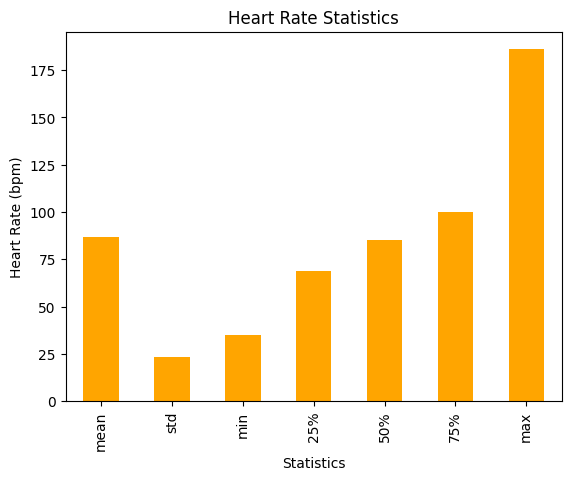

In [46]:
stats['hr'].iloc[1:].plot( title='Heart Rate Statistics', ylabel='Heart Rate (bpm)', xlabel='Statistics', kind='bar', color='orange')
plt.show()

<Axes: title={'center': 'BMI Statistics'}, xlabel='Statistics', ylabel='BMI'>

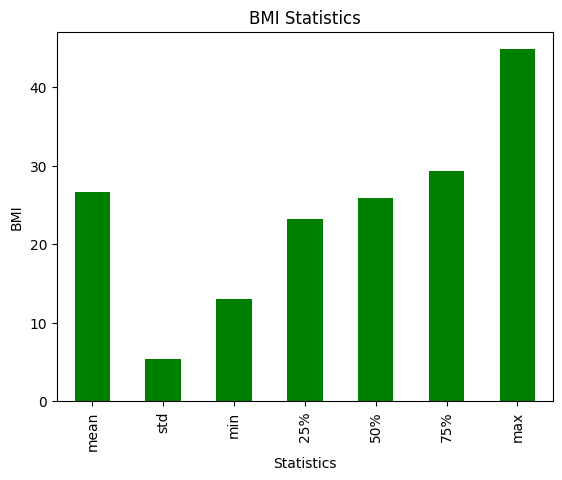

In [47]:
stats['bmi'].iloc[1:].plot( title='BMI Statistics', ylabel='BMI', xlabel='Statistics', kind='bar', color='green')

<Axes: title={'center': 'Age Statistics'}, xlabel='Statistics', ylabel='Age'>

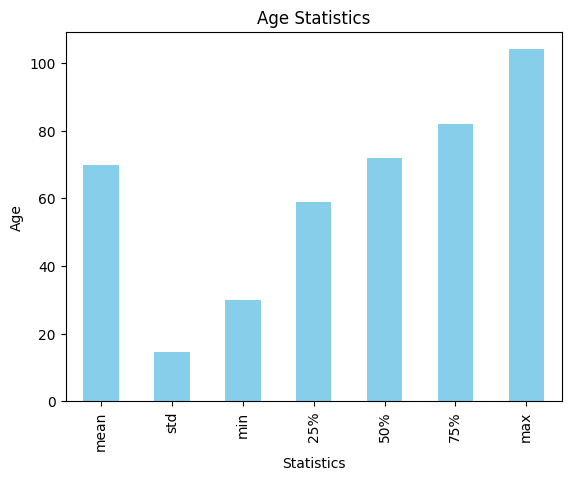

In [48]:
stats['age'].iloc[1:].plot( title='Age Statistics', ylabel='Age', xlabel='Statistics', kind='bar', color='skyblue')

<a name="4"></a>
## 4 - Exploratory Data Analysis (EDA)
---
Furthermore, exploration of the distribution of quantitative features in the dataset is recommended in order to better understand the univariate central tendency and variability. Both ‘hr’ and ‘bmi’ features are unimodal histograms that are slightly skewed to the right, while the ‘age’ feature is a bimodal skew-normal (BSN). (Elal-Olivero et al., 2020)

<Axes: title={'center': 'BMI Distribution'}, xlabel='bmi', ylabel='Frequency'>

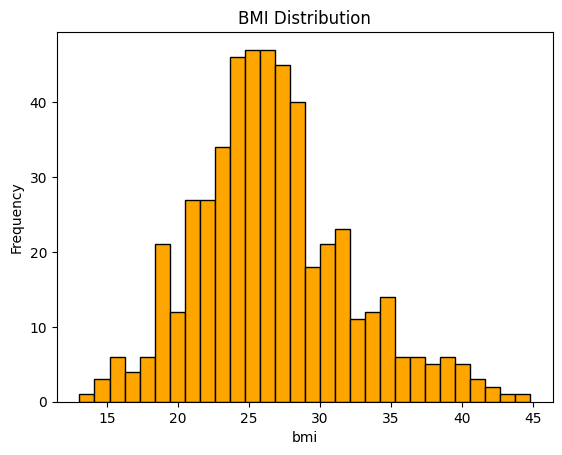

In [49]:
df['bmi'].plot(kind='hist', bins=30, title='BMI Distribution',
                 xlabel='bmi', ylabel='Frequency', edgecolor='black',
                 color='orange')

<Axes: title={'center': 'Heart Rate Distribution'}, xlabel='Heart Rate', ylabel='Frequency'>

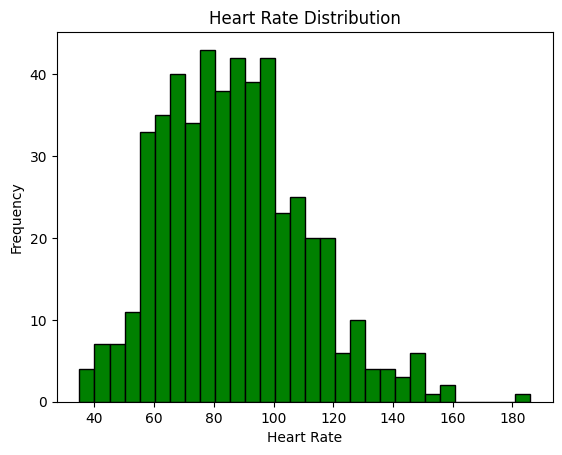

In [50]:
df['hr'].plot(kind='hist', bins=30, title='Heart Rate Distribution',
                 xlabel='Heart Rate', ylabel='Frequency', edgecolor='black',
                 color='green')

<Axes: title={'center': 'Age Distribution'}, xlabel='Age', ylabel='Frequency'>

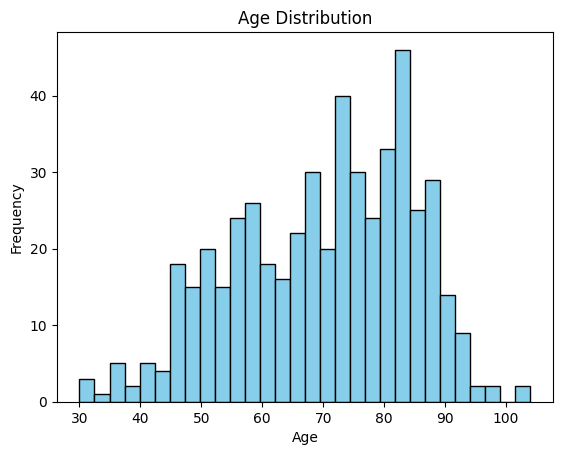

In [51]:
df['age'].plot(kind='hist', bins=30, title='Age Distribution',
                 xlabel='Age', ylabel='Frequency', edgecolor='black',
                 color='skyblue')

The dataset contains a protected feature, gender, with an appropriate male-to-female ratio of 60:40. Consequently, the dataset is ethically viable for further analysis and is ready for data cleaning.

Male percentage: 60%
Female percentage: 40%


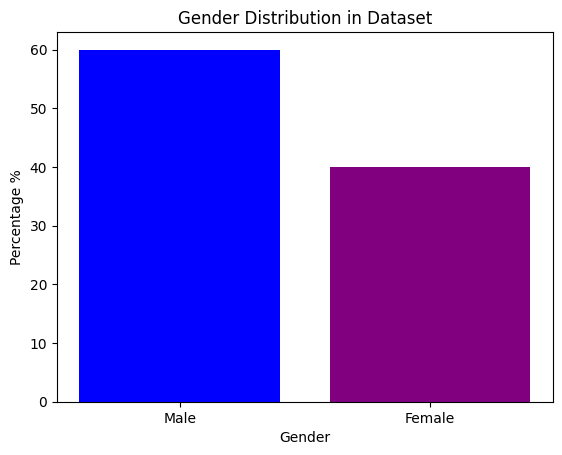

In [52]:
male = df[df['gender'] == 0]
female = df[df['gender'] == 1]
male_percentage = male.shape[0]/df.shape[0] * 100
female_percentage = female.shape[0]/df.shape[0] * 100
sex = ['Male', 'Female']
print(f"Male percentage: {male_percentage :.0f}%")
print(f"Female percentage: {female_percentage :.0f}%")
percentage = [male_percentage, female_percentage]
plt.bar(sex, percentage, color=['blue', 'purple'])
plt.title('Gender Distribution in Dataset')
plt.xlabel('Gender')
plt.ylabel('Percentage %')
plt.show()

<a name="5"></a>
## 5 - Preprocessing

<a name="5.1"></a>
### 5.1 - Data Cleaning
---

In [54]:
df.drop(columns=['id','fdate', 'admitdate', 'disdate'], inplace=True)
df.info()
org_df = df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     500 non-null    int64  
 1   gender  500 non-null    int64  
 2   hr      500 non-null    int64  
 3   sysbp   500 non-null    int64  
 4   diasbp  500 non-null    int64  
 5   bmi     500 non-null    float64
 6   cvd     500 non-null    int64  
 7   afb     500 non-null    int64  
 8   sho     500 non-null    int64  
 9   chf     500 non-null    int64  
 10  av3     500 non-null    int64  
 11  miord   500 non-null    int64  
 12  mitype  500 non-null    int64  
 13  year    500 non-null    int64  
 14  los     500 non-null    int64  
 15  dstat   500 non-null    int64  
 16  lenfol  500 non-null    int64  
 17  fstat   500 non-null    int64  
dtypes: float64(1), int64(17)
memory usage: 70.4 KB


Here, it is essential to consider the context to accurately assess the strength of the dataset features' relationships. A correlation worth noting is the approximately 40% relationship strength between the target feature, cagidogenic shock status ‘sho’, and the feature ‘dstat’, which represents discharge status from the hospital.

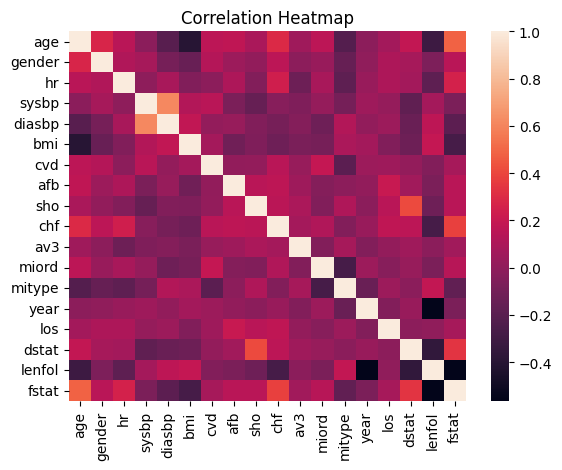

In [55]:
sns.heatmap(df.corr())
plt.title('Correlation Heatmap')
plt.show()

The feature BMI is grouped according to category, here it shows that the dataset's patients are majority overweight.

In [16]:
df['bmi_group'] = df['bmi'].map(lambda x: 'Underweight' if x < 18.5 else
                                        'Normal weight' if 18.5 <= x < 24.9999 else
                                        'Overweight' if 25 <= x < 29.9999 else
                                        'Obesity I' if 30 <= x < 34.9999 else
                                        'Obesity II' if 35 <= x < 39.9999 else
                                        'Obesity III' if 40 <= x < 50 else
                                        'Obesity IV' if x >= 50 else 'Unknown')

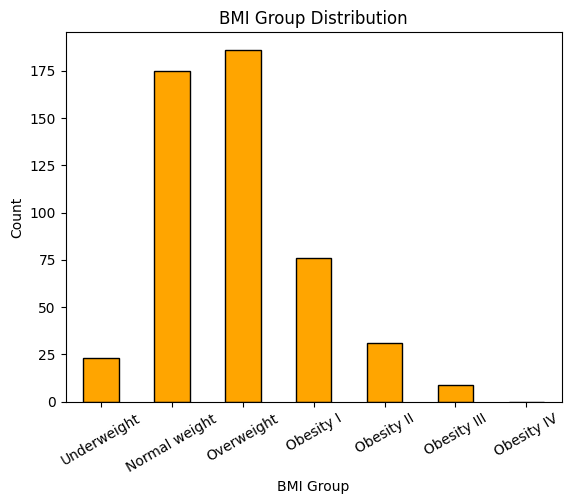

In [17]:
bmi_group = ['Underweight', 'Normal weight', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III', 'Obesity IV']
bmi_group_counts = df['bmi_group'].value_counts().sort_index().reindex(bmi_group)
bmi_group_counts.plot(kind='bar', color='orange', edgecolor='black',
                title='BMI Group Distribution', xlabel='BMI Group', ylabel='Count',rot=30)
plt.show()

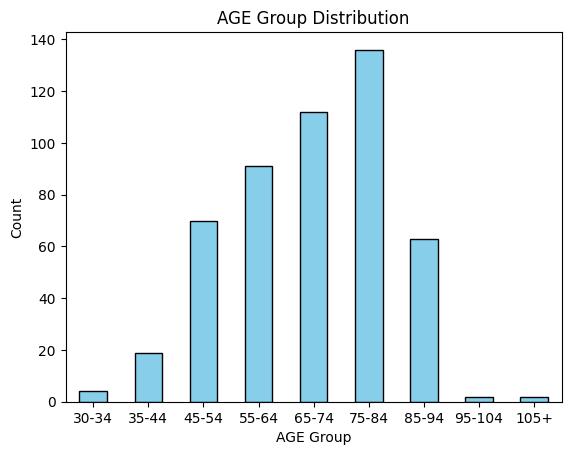

In [18]:
df['age_group'] = pd.cut(df['age'], bins=[30, 35, 45, 55, 65, 75, 85, 95, 100, 105],
                            labels=['30-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85-94', '95-104', '105+'])

age_counts = df['age_group'].value_counts().sort_index()
age_counts.plot(kind='bar', color='skyblue', edgecolor='black',
                title='AGE Group Distribution', xlabel='AGE Group', ylabel='Count', rot=0)
plt.show()

<a name="5.2"></a>
### 5.2 - Data Transformation
---

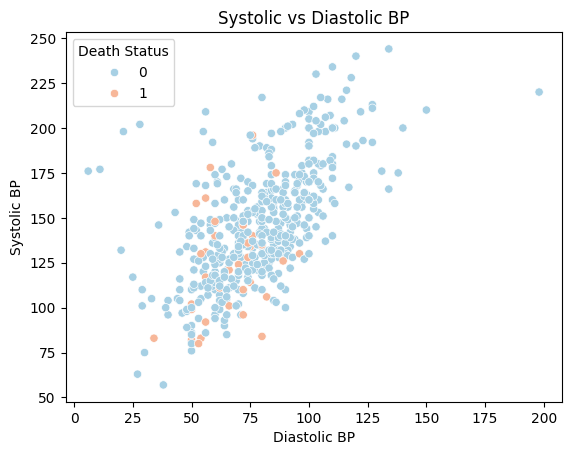

In [19]:
sns.scatterplot(data=df, x='diasbp', y='sysbp', hue='dstat', palette='RdBu_r')
plt.title('Systolic vs Diastolic BP')
plt.xlabel('Diastolic BP')
plt.ylabel('Systolic BP')
plt.legend(title='Death Status')
plt.show()

<a name="5.2.1"></a>
#### 5.2.1 - Feature Engineering
---
The feature ‘bp’ was engineered by dividing the systolic blood pressure by the diastolic blood pressure. The new feature contains information from both features and enables a bivariate comparison with another feature. Outliers were handled by eliminating values greater than the absolute value of three standard deviations from the mean. Figure 7-2 displays a dot plot of length of stay by BP. The trend line in red visualizes the slight positive correlation between the newly engineered feature and the number of days patients stay in the hospital.

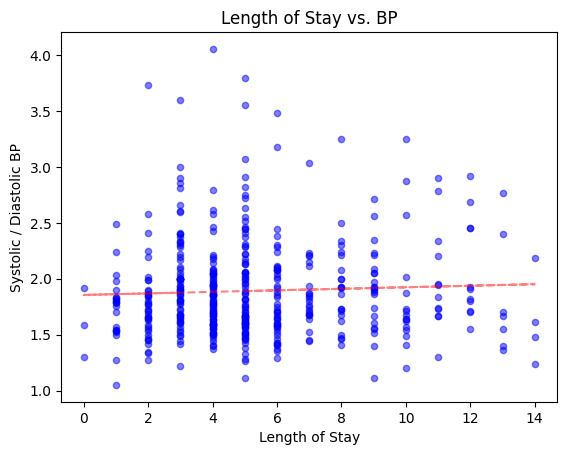

In [ ]:
df['bp']= df['sysbp'] / df['diasbp'] 
df = df[df['bp'] < abs(df['bp'].std()*3)]
df = df[df['los'] < abs(df['los'].std()*3)]

m, b = np.polyfit(df['los'], df['bp'], 1)
y_fit = m*df['los'] + b

df.plot.scatter(x='los', y='bp', alpha=0.5, color='blue',
                title='Length of Stay vs. BP', xlabel='Length of Stay',
                ylabel='Systolic / Diastolic BP')
plt.plot(df['los'], y_fit, linestyle='--', label='Trend Line', \
    color = 'red', alpha=0.5)
plt.show()

Another engineered feature is ‘pulse_pressure’, which was calculated by subtracting the diastolic bp from the systolic bp. Figure 8-2 displays the boxplot of pulse pressure by age group, showcasing a slight positive linear relationship between pulse pressure and age.

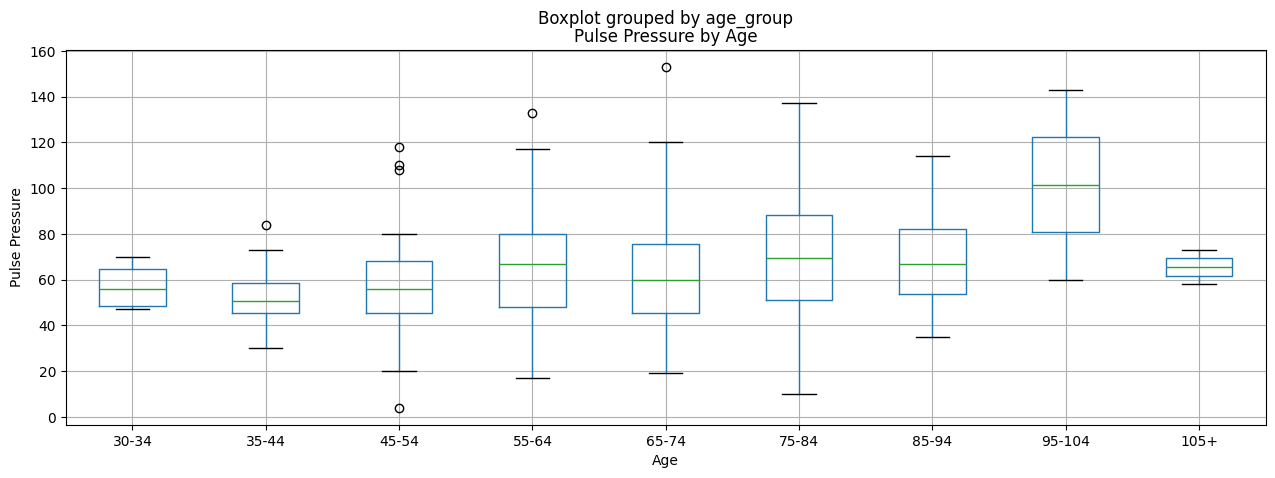

In [21]:
df['pulse_pressure'] = df['sysbp'] - df['diasbp']
df.boxplot(column='pulse_pressure', by = "age_group", figsize=(15, 5))
plt.title('Pulse Pressure by Age',)
plt.xlabel('Age')
plt.ylabel('Pulse Pressure')
plt.show()

<a name="5.2.2"></a>
#### 5.2.2 - Synthetic Data Generation
---
The original dataset contained only 4% of the target feature’s positive status. To adequately balance the dataset and ensure optimal accuracy, SHAP was leveraged to generate additional observations with a positive status. A synthetic generator was trained on the original dataset to create the synthetic data. The dataset was then split into training and test sets, and the training set was used to generate artificial data of size 8000 with statistical variation mimicking the original dataset, retaining only observations with a positive status. The newly generated data was then added back to the original training set, and the training set was recombined with the test set. The new dataframe’s target feature now possesses a positive status of 41%.

In [22]:
api_key = userdata.get('MOSTLYAI_API')
mostly = MostlyAI(local=False, api_key=api_key)

Initializing Synthetic Data SDK 5.5.1 in CLIENT mode 📡

Connected to ]8;id=48118;https://app.mostly.ai\https://app.mostly.ai]8;;\ 5.5.0 as arewaiyi@gmail.com

In [23]:
# Train generator on original data
g = mostly.train(config={
    'name': 'WHAS500 Synthetic Data for model optimization',
    'tables': [{
        'name': 'data',
        'data': df,
        'tabular_model_configuration': {'max_training_time': 1},
    }]
})

Created generator ]8;id=497894;https://app.mostly.ai/d/generators/1c965095-dbf5-4739-8048-5f462160e8aa\1c965095-dbf5-4739-8048-5f462160e8aa]8;;\

Started generator training

Output()

🎉 Your generator is ready! Use it to create synthetic data. Publish it so others can do the same.

In [24]:
X = df.drop(columns=['sho'])
y = df['sho']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
org_train_df = pd.concat([X_train, y_train], axis=1)
org_test_df = pd.concat([X_test, y_test], axis=1)
test_df = org_test_df.copy()
train_df = org_train_df.copy()

In [25]:
# Function to generate new synthetic data and merge positive target
# observations to original data.
def synthetic_target_feature_generation(df, g):
  target_pos = df[df['sho'] == 1].shape[0]
  target_pos_ratio = target_pos/df.shape[0]
  syn = mostly.generate(g, size = 8000).data()
  syn_target_pos_df = syn[syn['sho'] == 1]
  temp_df = pd.concat([df, syn_target_pos_df], ignore_index=True)
  target_pos_ratio = temp_df[temp_df['sho'] == 1].shape[0]/temp_df.shape[0]
  print(f'New Target Positive Ratio: {target_pos_ratio}')
  return temp_df



In [26]:
# generate increased positive target feature with synthetic data
syn_df =  synthetic_target_feature_generation(df, g)


Created synthetic dataset ]8;id=876198;https://app.mostly.ai/d/synthetic-datasets/b979b49b-a595-4bd0-80e9-e83d58346d83\b979b49b-a595-4bd0-80e9-e83d58346d83]8;;\ with generator ]8;id=645019;https://app.mostly.ai/d/generators/1c965095-dbf5-4739-8048-5f462160e8aa\1c965095-dbf5-4739-8048-5f462160e8aa]8;;\

Started synthetic dataset generation

Output()

🎉 Your synthetic dataset is ready! Use it to consume the generated data. Publish it so others can do the same.

New Target Positive Ratio: 0.31921331316187596


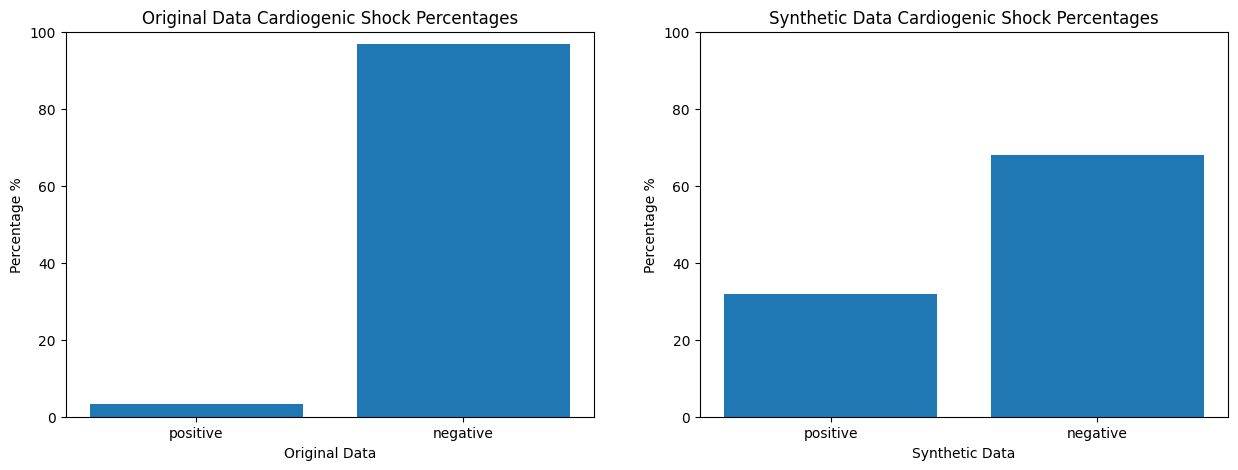

In [27]:
label = ['Original Data', 'Synthetic Data']
positive_sho = df[df['sho'] == 1].shape[0]/df.shape[0] * 100
negative_sho = df[df['sho'] == 0].shape[0]/df.shape[0] * 100
positive_syn_sho = syn_df[syn_df['sho'] == 1].shape[0]/syn_df.shape[0] * 100
negative_syn_sho = syn_df[syn_df['sho'] == 0].shape[0]/syn_df.shape[0] * 100
y_val =[[positive_sho, negative_sho], [positive_syn_sho, negative_syn_sho]]
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
for i in range(2):
  x = ['positive', 'negative']
  y = y_val[i]
  ax[i].bar(x, y)
  ax[i].set_xlabel(label[i])
  ax[i].set_ylabel('Percentage %')
  ax[i].set_title(f'{label[i]} Cardiogenic Shock Percentages')
  ax[i].set_ylim(0, 100)
plt.show()


<a name="6"></a>
## 6 - ISLP Synthetic Data Model Prediction Result
---

In [28]:
allvars = syn_df.columns.drop(['sho', 'bmi_group', 'age_group'])
design = MS(allvars)
X = design.fit_transform(syn_df)
y = syn_df['sho']
glm =sm.GLM(y, X, family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,0.200400,1.057,0.190,0.850
age,0.002000,0.007,0.304,0.761
gender,-0.206300,0.188,-1.099,0.272
hr,0.000900,0.003,0.291,0.771
sysbp,0.000600,0.003,0.200,0.841
diasbp,0.002000,0.004,0.454,0.650
bmi,-0.015000,0.018,-0.855,0.393
cvd,-0.150600,0.198,-0.760,0.447
afb,0.221300,0.249,0.888,0.374
chf,0.191800,0.198,0.971,0.332


Although the accuracy score is 96% the precision, recall and f1-score fall well below expectations at 25%, 33%, and 29% respectively. This model was built with synthetic data and no feature selection implemented. The confusion matrix displays 1 true positive prediction out of 3.

In [29]:
print("#"*20, "WHAS500 Applied Survival Analysis Dataset", "#"*20)
print("#"*10, "Cardiogenic Shock Prediction Report With Synthetic Data", "#"*10)
X_test = design.fit_transform(test_df)
y_test = test_df['sho']
probabilities = results.predict(exog=X_test)
y_pred = [1 if prob > 0.5 else 0 for prob in probabilities]

print(classification_report(y_test, y_pred))

print("#"*10, "Cardiogenic Shock Confusion Matrix With Synthetic Data", "#"*10)
print(confusion_matrix(y_test, y_pred))

#################### WHAS500 Applied Survival Analysis Dataset ####################
########## Cardiogenic Shock Prediction Report With Synthetic Data ##########
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       137
           1       0.25      0.33      0.29         3

    accuracy                           0.96       140
   macro avg       0.62      0.66      0.63       140
weighted avg       0.97      0.96      0.97       140

########## Cardiogenic Shock Confusion Matrix With Synthetic Data ##########
[[134   3]
 [  2   1]]


Here the accuracy score is 98% however, this is misleading. The precision, recall, and F1 score for positive targets are all 0% with no instance of correct predictions of positive target values. This model was built p-value < .05 feature selection.

In [30]:
allvars = syn_df.columns.drop(['dstat', 'fstat', 'afb', 'sho', 'chf','av3',
                           'gender', 'year', 'lenfol',
                           'mitype', 'bmi_group', 'age_group'])
design = MS(allvars)
X = design.fit_transform(syn_df)
y = syn_df['sho']
glm = sm.GLM(y, X, family=sm.families.Binomial())
results = glm.fit()
print("#"*20, "WHAS500 Applied Survival Analysis Dataset", "#"*20)
print("#"*10, "Cardiogenic Shock Prediction Report With Synthetic Data P-value > 0.05 drop", "#"*10)
X_test = design.fit_transform(test_df)
y_test = test_df['sho']
probs = results.predict(exog=X_test)
y_pred = [1 if prob > 0.5 else 0 for prob in probs]

print(classification_report(y_test, y_pred))

#################### WHAS500 Applied Survival Analysis Dataset ####################
########## Cardiogenic Shock Prediction Report With Synthetic Data P-value > 0.05 drop ##########
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       137
           1       0.00      0.00      0.00         3

    accuracy                           0.98       140
   macro avg       0.49      0.50      0.49       140
weighted avg       0.96      0.98      0.97       140



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<a name="6.1"></a>
### 6.1 - Optimizing Model Accuracy with Tiling
---
The second model was built using training data aggregated with identical copies of the original dataset's target features, also known as tiling, thereby increasing the positive-to-negative target feature ratio from 4:96 to 40:60. The synthetic data model generated higher accuracy percentages when the model was built with feature selection of p-value < 0.05, with a 1- 4% increase.

In [31]:
train_df = org_train_df
test_df = org_test_df
pos = train_df[train_df['sho'] == 1]
neg = train_df[train_df['sho'] == 0]
positive = pos.shape[0]
negative = neg.shape[0]
pos_percentage = positive/train_df.shape[0]
neg_percentage = negative/train_df.shape[0]
print(f"{pos_percentage:.2f} of the dataset experienced cardiogenic shock")
print(f"{neg_percentage:.2f} of the dataset did not experience cardiogenic shock")
# # Ensure initial default porportions
# print(f"{positive_percentage:.2f} of the dataset has defaulted")
# print(f"{negative_percentage:.2f} of the dataset has not defaulted")

0.04 of the dataset experienced cardiogenic shock
0.96 of the dataset did not experience cardiogenic shock


In [32]:
_pos = np.tile(pos,(17,1))
print(_pos.shape)
print(neg.shape)

(204, 22)
(313, 22)


In [33]:
pos = pd.DataFrame(_pos, columns=neg.columns)
positive = pos.shape[0]
train_df = pd.concat([pos, neg], axis=0)
pos_percentage = positive/train_df.shape[0] * 100
neg_percentage = negative/train_df.shape[0] * 100
print(f"{pos_percentage:.2f} of the dataset experienced cardiogenic shock")
print(f"{neg_percentage:.2f} of the dataset did not experience cardiogenic shock")
# # Ensure initial default porportions
# print(f"{positive_percentage:.2f} of the dataset has defaulted")
# print(f"{negative_percentage:.2f} of the dataset has not defaulted")

39.46 of the dataset experienced cardiogenic shock
60.54 of the dataset did not experience cardiogenic shock


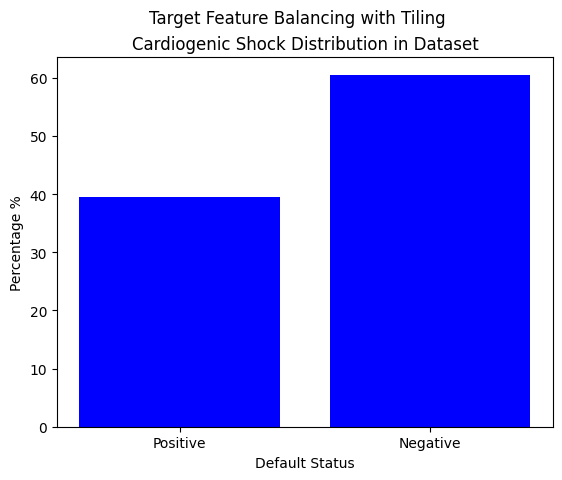

In [34]:
status = ['Positive', 'Negative']
percentage = [pos_percentage, neg_percentage]
plt.bar(status, percentage, color=['blue'])
plt.suptitle('Target Feature Balancing with Tiling')
plt.title('Cardiogenic Shock Distribution in Dataset')
plt.xlabel('Default Status')
plt.ylabel('Percentage %')
plt.show()

In [35]:
cols = df.columns.to_list()
for c in cols:
  train_df[c] = train_df[c].astype(df[c].dtypes)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 517 entries, 0 to 108
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             517 non-null    int64   
 1   gender          517 non-null    int64   
 2   hr              517 non-null    int64   
 3   sysbp           517 non-null    int64   
 4   diasbp          517 non-null    int64   
 5   bmi             517 non-null    float64 
 6   cvd             517 non-null    int64   
 7   afb             517 non-null    int64   
 8   chf             517 non-null    int64   
 9   av3             517 non-null    int64   
 10  miord           517 non-null    int64   
 11  mitype          517 non-null    int64   
 12  year            517 non-null    int64   
 13  los             517 non-null    int64   
 14  dstat           517 non-null    int64   
 15  lenfol          517 non-null    int64   
 16  fstat           517 non-null    int64   
 17  bmi_group       517 n

In [36]:
allvars = train_df.columns.drop([ 'sho', 'bmi_group', 'age_group'])
design = MS(allvars)
X = design.fit_transform(train_df)
y = train_df['sho']
glm = sm.GLM(y, X, family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,0.2637,3.317,0.079,0.937
age,0.0569,0.021,2.703,0.007
gender,-0.3153,0.437,-0.722,0.470
hr,-0.0248,0.009,-2.855,0.004
sysbp,-0.0280,0.005,-5.623,0.000
diasbp,0.0053,0.018,0.297,0.766
bmi,-0.0449,0.046,-0.984,0.325
cvd,0.5047,0.486,1.039,0.299
afb,3.4284,0.536,6.397,0.000
chf,1.3026,0.496,2.627,0.009


Here this model has an 88% accuracy score with only 1 true positive predicted out of 3. This model implemented no feature selection.

In [37]:
print("#"*20, "WHAS500 Applied Survival Analysis Dataset", "#"*20)
print("#"*10, "Cardiogenic Shock Prediction Report With Object type and Target feature Drop", "#"*10)
X_test = design.fit_transform(test_df)
y_test = test_df['sho']
probs = results.predict(exog=X_test)
y_pred = [1 if prob > 0.5 else 0 for prob in probs]

print(classification_report(y_test, y_pred))

print("#"*10, "Cardiogenic Shock Confusion Matrix With Tiled Data", "#"*10)
print(confusion_matrix(y_test, y_pred))

#################### WHAS500 Applied Survival Analysis Dataset ####################
########## Cardiogenic Shock Prediction Report With Object type and Target feature Drop ##########
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       137
           1       0.06      0.33      0.11         3

    accuracy                           0.88       140
   macro avg       0.52      0.61      0.52       140
weighted avg       0.96      0.88      0.92       140

########## Cardiogenic Shock Confusion Matrix With Tiled Data ##########
[[122  15]
 [  2   1]]


This tiled model with p-value feature selection, produced an accuracy score of 84% with no true positive prediction out of 3 possible observations.

In [38]:

allvars = train_df.columns.drop(['dstat', 'fstat', 'afb', 'sho', 'chf','av3',
                           'gender', 'year', 'lenfol',
                           'mitype', 'bmi_group', 'age_group'])
design = MS(allvars)
X = design.fit_transform(train_df)
y = train_df['sho']
glm = sm.GLM(y, X, family=sm.families.Binomial())
results = glm.fit()
print("#"*20, "WHAS500 Applied Survival Analysis Dataset", "#"*20)
print("#"*10, "Cardiogenic Shock Prediction Report P-Value Feature Selection", "#"*10)
X_test = design.fit_transform(X_test)
probs = results.predict(exog=X_test)
y_pred = [1 if prob > 0.5 else 0 for prob in probs]

print(classification_report(y_test, y_pred))

#################### WHAS500 Applied Survival Analysis Dataset ####################
########## Cardiogenic Shock Prediction Report P-Value Feature Selection ##########
              precision    recall  f1-score   support

           0       0.97      0.85      0.91       137
           1       0.00      0.00      0.00         3

    accuracy                           0.84       140
   macro avg       0.49      0.43      0.46       140
weighted avg       0.95      0.84      0.89       140



<a name="7"></a>
## 7 - SciKit Learn Grid Search CV PipeLine Model
---

he third model was created with a scikit learn GridSearchCV pipeline, where the dataset was scaled and transformed with StandardScaler, the optimal model chosen from PCA with feature selection of PCA number of components [5, 10, 15], solver set at [‘liblinear’, ‘lbfgs’], and gridsearch cross-validation conducted across five separate folds. This method produced an overall accuracy score of 97%; however, the precision score for positive target values was 0% which nullifies the utility of this model.


In [39]:


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model', LogisticRegression())
])

param_grid = {
    'pca__n_components': [5,10,15],
    'model__C': [ 0.1, 1, 10],
    'model__solver': ['liblinear', 'lbfgs'],
}
df.dropna()
X = df.drop(columns=['sho','age_group', 'bmi_group' ])
y = df['sho']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=1)
grid_search.fit(X_train, y_train)

print(f"Best cross-validated accuracy: {grid_search.best_score_:.4f}")
print(f"Best parameters: {grid_search.best_params_}")

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))


print("#"*10, "Cardiogenic Shock Confusion Matrix With GridSearchCV", "#"*10)
print(confusion_matrix(y_test, y_pred))

Best cross-validated accuracy: 0.9692
Best parameters: {'model__C': 1, 'model__solver': 'liblinear', 'pca__n_components': 10}
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       137
           1       0.00      0.00      0.00         3

    accuracy                           0.97       140
   macro avg       0.49      0.50      0.49       140
weighted avg       0.96      0.97      0.96       140

########## Cardiogenic Shock Confusion Matrix With GridSearchCV ##########
[[136   1]
 [  3   0]]


<a name="8"></a>
## 8 - Optimal Model Choice
---

Implementing diagnostic analysis, a simpler logistic regression model with a liblinear solver was created with no complexities. This model produced a 97% accuracy score contextualized with precision, recall, and F1-scores of [75%, 50%, 60%], respectively. This model’s confusion matrix classified 143 true negatives out of  144 and 3 true positives out of 6.

In [40]:
df = pd.read_csv('whas500.csv')
scale = StandardScaler()
X = df.drop(columns=['sho', 'admitdate', 'disdate', 'fdate'], axis=1)
y = df['sho']
X = scale.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=156 )
X_test = scale.fit_transform(X_test)
y_pred = LogisticRegression(solver = 'liblinear', random_state=0).fit(X_train, y_train).predict(X_test)

print("Accuracy Verification:", accuracy_score(y_test, y_pred))
print("Confusion Matrix Verification:\n", confusion_matrix(y_test, y_pred))
print("Classification Report Verification:\n", classification_report(y_test, y_pred))


Accuracy Verification: 0.9733333333333334
Confusion Matrix Verification:
 [[143   1]
 [  3   3]]
Classification Report Verification:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       144
           1       0.75      0.50      0.60         6

    accuracy                           0.97       150
   macro avg       0.86      0.75      0.79       150
weighted avg       0.97      0.97      0.97       150



<a name="9"></a>
## 9 - Conclusion
---
In conclusion, the results of this report underscore a regular yet straightforward observation that occurs in everyday life. Sometimes the best solution is the simplest solution. In the case of this logistic regression report, a simple scikit-learn logistic regression model scaled with StandardScaler produced the optimal model choice, possessing an accuracy score of 97%, contextualized with precision, recall, and F1-scores of [75%, 50%, 60%] with the least ethical ramifications among all experimental methods.

This report aims to promote the contextualization of model accuracy scores with precision, recall, and F1 scores. As the result section outlines, failing to assess a model using various metrics can result in severe ramifications when deployed in production. In the case of cardiogenic shock prediction, this report recommends use of a model trained on a larger dataset with a suitable ratio of positive target instances where no tiling, or synthetic data is necessary with features contained in the whas500 dataset and added features to include but not limited to weight, physical activity level, smoking habits, and cholesterol levels, to build an accurate and ethical model for use in the healthcare field, as suggested by the American Heart Association.
